# CLS study

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Loading the data (from npy files)

We will load the data we created thanks to the *data_cls.py* file.

In [3]:
# FlauBERT data
with open('numpy_save/flaubert_raw_layer_12.npy', 'rb') as f:
    train_fl_12 = np.load(f)
    train_label_fl_12 = np.load(f)
    test_fl_12 = np.load(f)
    test_label_fl_12 = np.load(f)

with open('numpy_save/flaubert_raw_layer_13.npy', 'rb') as f:
    train_fl_13 = np.load(f)
    train_label_fl_13 = np.load(f)
    test_fl_13 = np.load(f)
    test_label_fl_13 = np.load(f)

with open('numpy_save/flaubert_ft.npy', 'rb') as f:
    train_fl_ft = np.load(f)
    train_label_fl_ft = np.load(f)
    test_fl_ft = np.load(f)
    test_label_fl_ft = np.load(f)

In [12]:
# CamemBERT data
with open('numpy_save/camembert_raw_layer_12.npy', 'rb') as f:
    train_cb_12 = np.load(f)
    train_label_cb_12 = np.load(f)
    test_cb_12 = np.load(f)
    test_label_cb_12 = np.load(f)

with open('numpy_save/camembert_raw_layer_13.npy', 'rb') as f:
    train_cb_13 = np.load(f)
    train_label_cb_13 = np.load(f)
    test_cb_13 = np.load(f)
    test_label_cb_13 = np.load(f)

with open('numpy_save/camembert_ft.npy', 'rb') as f:
    train_cb_ft = np.load(f)
    train_label_cb_ft = np.load(f)
    test_cb_ft = np.load(f)
    test_label_cb_ft = np.load(f)

## Construction of the keras model

In [6]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras import optimizers

In [7]:
def visu_perf_model(history: tensorflow.keras.callbacks.History
                    ) -> matplotlib.figure.Figure:
    # Get training and test loss histories
    training_loss = history.history["loss"]
    test_loss = history.history["val_loss"]
    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # --> visualisation of the loss
    ax1.plot(epoch_count, training_loss, "r--")
    ax1.plot(epoch_count, test_loss, "b-")
    ax1.legend(["Training Loss", "Test Loss"])
    ax1.set(xlabel="Epoch", ylabel="Loss")
    ax1.set_title("LOSS VISU")

    # --> visualisation of the accuracy
    training_accuracy = history.history["accuracy"]
    test_accuracy = history.history["val_accuracy"]

    ax2.plot(epoch_count, training_accuracy, "r--")
    ax2.plot(epoch_count, test_accuracy, "b-")
    # Visualize accuracy history
    ax2.legend(["Training Accuracy", "Test Accuracy"])
    ax2.set(xlabel="Epoch", ylabel="Accuracy")
    ax2.set_title("ACC VISU")

    return fig

In [22]:
def class_head(X_train, y_train,
               X_test, y_test,
               lr: float = 0.001,
               type: str = "XML"):
    # creation of the model
    # here it is a simple logistic regression
    model = Sequential()
    model.add(Input(shape=(768,)))
    if type == "RoBERTa":
        # roberta class Head : 1 layer with tanh act
        model.add(Dense(units=768, activation="tanh"))

    model.add(Dense(units=1, activation="sigmoid"))

    opt = optimizers.Adam(learning_rate=lr)

    model.compile(loss="binary_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])

    model.summary()

    history = model.fit(X_train,
                        y_train,
                        epochs=30,
                        verbose=1,
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        )

    fig = visu_perf_model(history)

    return model, fig

## The study

## For CamemBERT

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 769       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 3s 6ms/step - loss: 0.6929 - accuracy: 0.5153 - val_loss: 0.6924 - val_accuracy: 0.5011
Epoch 2/30
188/188 [==============================] - 1s 3ms/step - loss: 0.6910 - accuracy: 0.5385 - val_loss: 0.6893 - val_accuracy: 0.5551
Epoch 3/30
188/188 [==============================] - 1s 3ms/step - loss: 0.6889 - accuracy: 0.5584 - val_loss: 0.6880 - val_accuracy: 0.5664
Epoch 4/30
188/188 [==============================] - 1s 4ms/step - loss: 0.6878 - accuracy: 0.5751 - val_loss: 0.6864 - val_accuracy: 0.5678
Epoch 5/30
188/188 [==============================] - 1s 3ms/step - loss: 0.6859 -

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7fa21300fe10>,
 <Figure size 1440x720 with 2 Axes>)

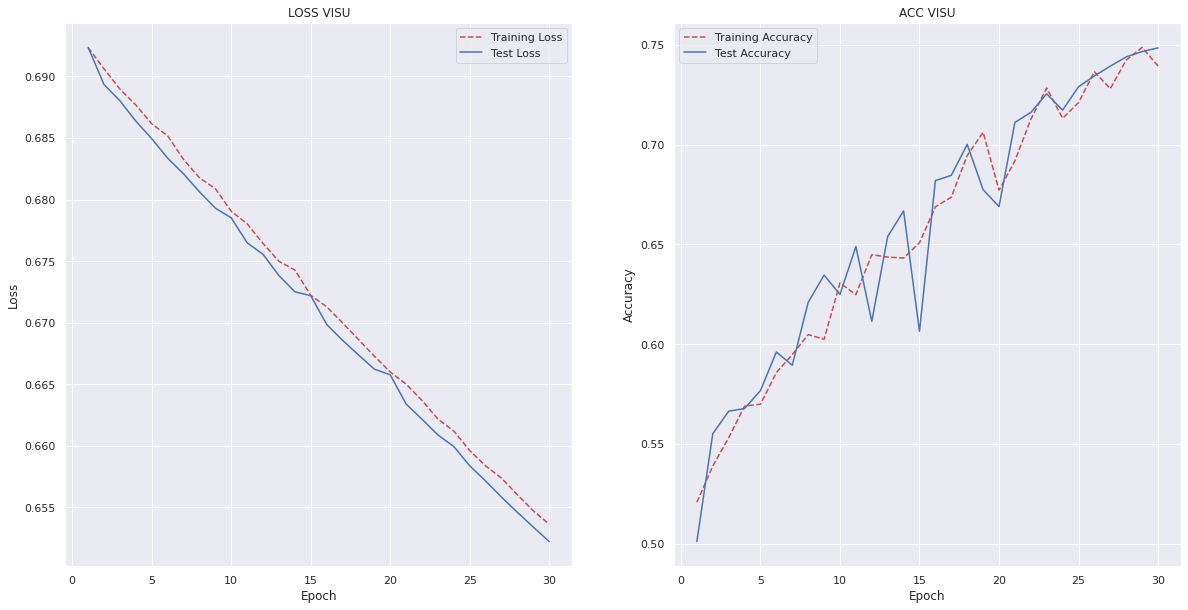

In [23]:
class_head(train_cb_12, train_label_cb_12, test_cb_12, test_label_cb_12)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 769       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 2s 7ms/step - loss: 0.6770 - accuracy: 0.6093 - val_loss: 0.6191 - val_accuracy: 0.7533
Epoch 2/30
188/188 [==============================] - 1s 3ms/step - loss: 0.6050 - accuracy: 0.7796 - val_loss: 0.5662 - val_accuracy: 0.7981
Epoch 3/30
188/188 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.8115 - val_loss: 0.5245 - val_accuracy: 0.8358
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.5133 - accuracy: 0.8259 - val_loss: 0.4932 - val_accuracy: 0.8466
Epoch 5/30
188/188 [==============================] - 0s 3ms/step - loss: 0.4855 

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7fa213011d90>,
 <Figure size 1440x720 with 2 Axes>)

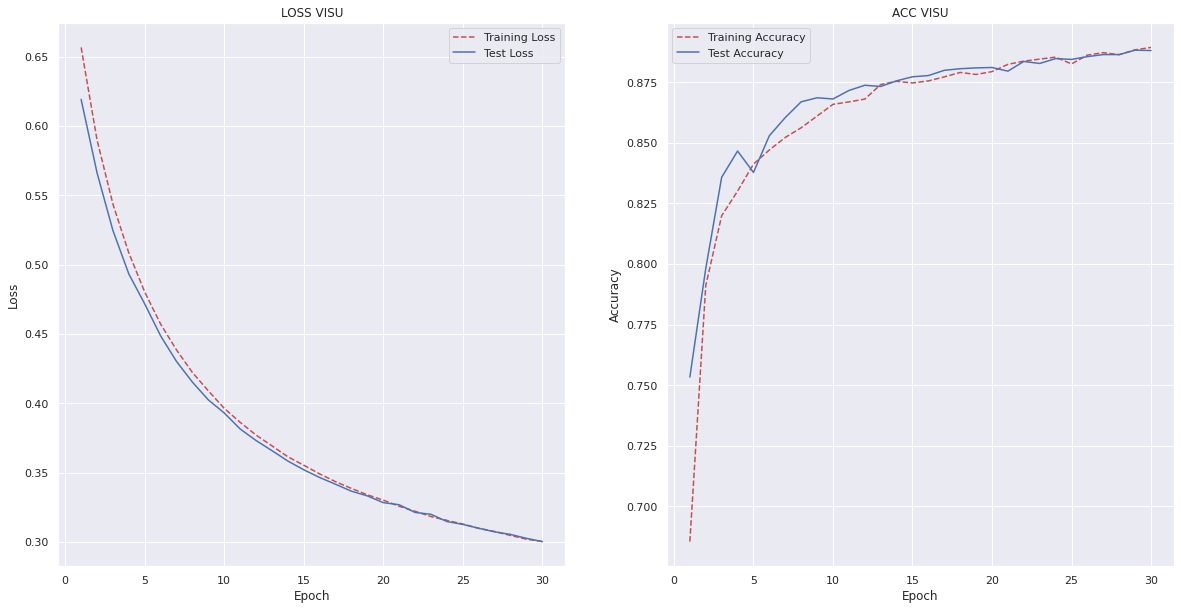

In [24]:
class_head(train_cb_13, train_label_cb_13, test_cb_13, test_label_cb_13)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 768)               590592    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 769       
Total params: 591,361
Trainable params: 591,361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 2s 10ms/step - loss: 0.9686 - accuracy: 0.5097 - val_loss: 0.6918 - val_accuracy: 0.5089
Epoch 2/30
188/188 [==============================] - 1s 6ms/step - loss: 0.7041 - accuracy: 0.5234 - val_loss: 0.6728 - val_accuracy: 0.5848
Epoch 3/30
188/188 [==============================] - 1s 7ms/step - loss: 0.6869 - accuracy: 0.5608 - val_loss: 0.6738 - val_accuracy: 0.5606
Epoch 4/30
188/188 [==============================] - 1s 7ms/step - loss: 0.6768 -

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7fa1bc118d90>,
 <Figure size 1440x720 with 2 Axes>)

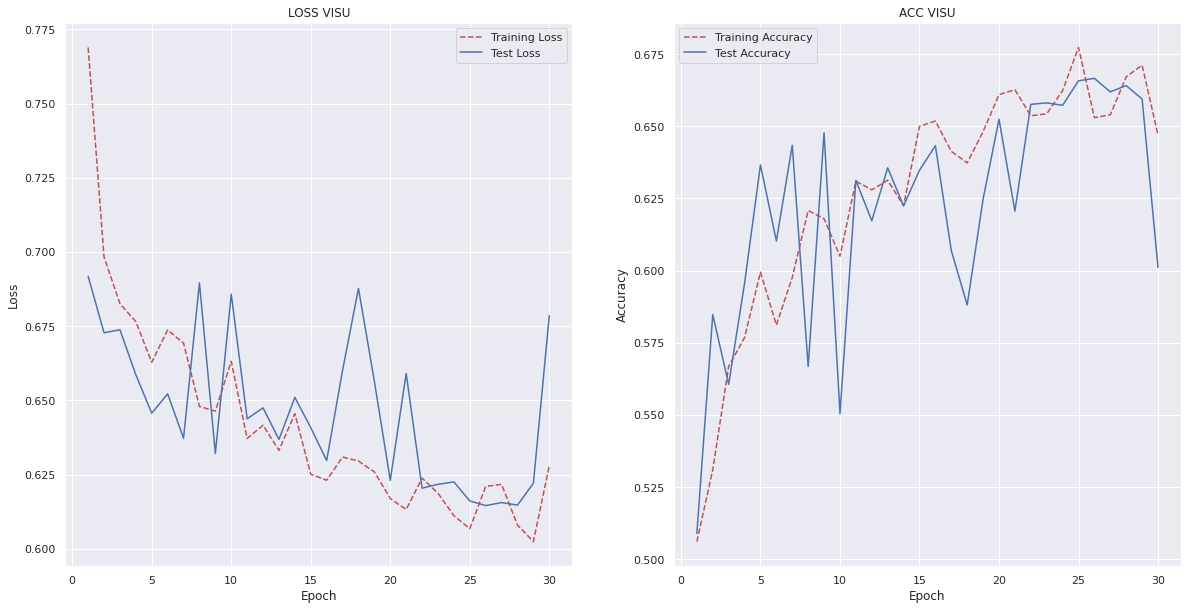

In [28]:
class_head(train_cb_ft, train_label_cb_13, test_cb_ft, test_label_cb_ft,
           type="RoBERTa",
           lr=0.001)

In [27]:
train_cb_ft.shape

(5997, 768)